In [ ]:
%config completer.use_jedi = False

In [ ]:
import dash
from dash import html
from dash import dcc
from dash.html.Button import Button
import plotly.express as px
from dash.dependencies import Input, Output,State
import numpy as np
from traitlets.traitlets import Int
import pandas as pd
import plotly.graph_objs as go
import pycountry
import plotly.io as pio
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px

In [ ]:
import pandas as pd

In [ ]:
import plotly.io as pio

In [ ]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=725fe6a1e5ea43bbacb6fa9370be43bba6c3b6246b1010388f5374d834ac1dfa
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
import pycountry

In [ ]:
df3 = pd.read_csv('/content/movies.csv')

In [ ]:
df3.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [ ]:
df3.dropna(inplace=True)
df.drop_duplicates(inplace = True)

In [ ]:
input_countries = df3['country'].unique()

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

df3['country_code'] = [countries.get(country, 'Unknown code') for country in df3['country']]

In [ ]:
df3

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_code
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,GBR
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,USA
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,USA
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,USA
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,USA
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,USA
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,USA
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,CAN


In [ ]:
pip install dash

     |████████████████████████████████| 9.6 MB 5.1 MB/s 
     |████████████████████████████████| 357 kB 66.2 MB/s 


In [ ]:
pio.templates.default = "plotly_dark"

In [ ]:
app=dash.Dash( external_stylesheets =['https://codepen.io/chriddyp/pen/bWLwgP.css'])

In [ ]:
#start Rating Distribution with Genres
movie_genre_gross = df.groupby(['genre'])['gross'].sum().to_frame().reset_index().sort_values('gross', ascending = False).head(8)
movie_genre_gross['genre'].to_list()
list_movie_genre_gross = sorted(movie_genre_gross['genre'].to_list())
# movie_genre_gross
list_movie_genre_gross

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Horror']

In [ ]:
genre_trend = df.groupby(['year','genre'])['gross'].sum().unstack().fillna(0)
genre_trend = genre_trend[['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Horror']]

In [ ]:
df['count'] = 1

In [ ]:
#get a list of all genres
genres = df['genre'].unique()

In [ ]:
order = pd.DataFrame(df.groupby('score')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['score'])
mf = df.groupby('genre')['score'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]
data = []
for i in genres:
    genre = mf.loc[i]
    data.append(go.Bar(x=genre.index, y=genre, name=i))

fig = go.Figure(data=data)
fig.update_layout(barmode='stack')


In [ ]:
#start map graph 
input_countries = df['country'].unique()

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

df['country_code'] = [countries.get(country, 'Unknown code') for country in df['country']]

fig_map = px.choropleth(df, color='budget', locations='country_code', hover_name='country')

In [ ]:
pip install wordcloud

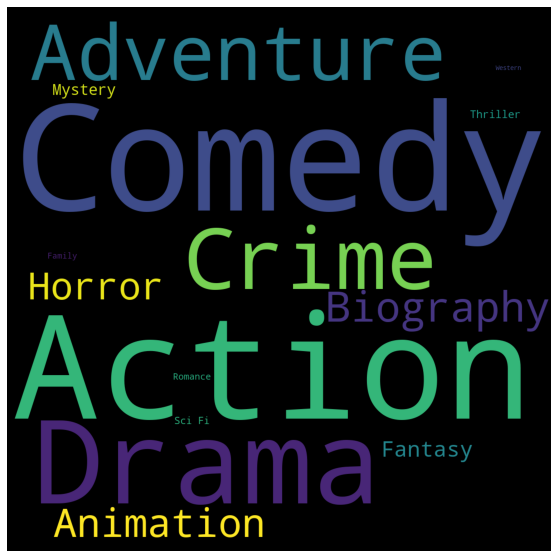

In [ ]:
from wordcloud import WordCloud

text = str(list(df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'black', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:

app.layout = html.Div([
    # Title Dashboard
    html.H1('Movie World DashBoard',  
            style = {'color':'White','fontsize':40,'textAlign':'center','border-width': 1, 'border': 'solid'}),
    
    #  First div contains two main parts , the first for a line chart and the other for the big numbers
    html.Div([
        html.Div([
            html.H3("WMDB Score Per Genre",
            style = {'color':'white','fontsize':20,'textAlign':'center','border-width': 1, 'border': 'solid', 'backgroundColor': '#916873'}),
            dcc.Graph(id='barChart', figure=fig)
            ], className='six columns'),

        # div for pie chart
    html.Div([
    dcc.Dropdown(
        id='names', 
        value='genre', 
        options=[{'value': x, 'label': x} 
                 for x in ['genre', 'rating']],
        clearable=False,
        style={'color': '#386CB0', "text-align": "center",'width':'50%'}
    ),
    dcc.Dropdown(
        id='values', 
        value='budget', 
        options=[{'value': x, 'label': x} 
                 for x in ['budget', 'score', 'runtime', 'gross', 'votes']],
        clearable=False
        ,
        style={'color': '#386CB0', "text-align": "center",'width': '50%'}
    ),
    dcc.Graph(id="pie-chart"),
    ], className='five columns'),
        
    ]),

    #map
   html.Div([
            html.H3("Countries Budget for Movies World",
            style = {'color':'white','fontsize':20,'textAlign':'center','border-width': 1, 'border': 'solid', 'backgroundColor': '#916873'}),
            dcc.Graph(id='mapChart', figure=fig_map, style={'margin-left' : '110px'})
            ], className='nine columns')
            ],style={'backgroundColor':'#916873'})
#start pie chart
@app.callback(
    Output("pie-chart", "figure"), 
    [Input("names", "value"), 
     Input("values", "value")])
def generate_chart(names, values):
    if names == None or values == None:
        fig = px.pie(df, values='budget', names='genre')
    
    else:
        fig = px.pie(df, values=values, names=names)

    return fig

#end pie chart
app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
